## Содержание
<a id='1'></a>
1. [Содержание](#1)
2. [Описание проекта](#1)
3. [Предобработка данных и EDA](#2)
4. [Модель прогнозирования оттока клиентов](#3)
5. [Кластеризация клиентов](#4)
    * [Доля оттока в каждом кластере](#5)
6. [Общиe выводы и рекомендации](#6)

## Описание проeкта
<a id='1'></a>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет.
Задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно: 
* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
* 1) выделить целевые группы клиентов;
* 2) предложить меры по снижению оттока;
* 3) определить другие особенности взаимодействия с клиентами.

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц.

Набор данных включает следующие поля:

* `Churn` — факт оттока в текущем месяце;
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах);
* `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Предобработка данных и EDA.
<a id='2'></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

### Определим функции для работы в этом разделе

In [2]:
def plot_hist(df:pd.DataFrame):
    """
    Функция для построения гистограмм
    Parameters:
    -----------
    df :class: объект класса DataFrame
    """
    sns.set(style="darkgrid", font_scale=1.1)
    for column in df.drop('churn', axis=1).columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(data=df.drop('churn', axis=1), x=column, kde=True)
        plt.show()

Загрузим датасет

In [3]:
df = pd.read_csv('gym_churn.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Приведём названия столбцов к snake_case

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Вывод
* Пропусков в данных нет
* Типы данных соответствуют их смыслу
* в столбцах, gender, near_location, partner, promo_friends, phone, group_visits, churn булевы типы записаны в int

Разделим датафрейм на тех, кто ушел в отток и тех кто остался

In [7]:
# отток
churn_true = df[df.churn == 1]
# остались
churn_false = df[df.churn != 1]

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток). Для этого воспользуемся нашей функцией `plot_hist`.

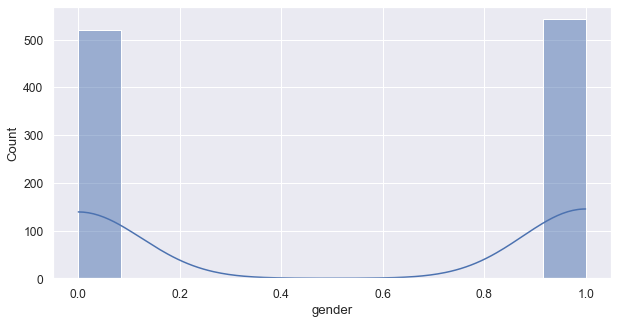

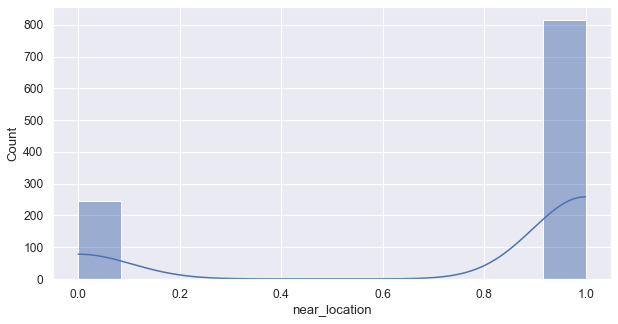

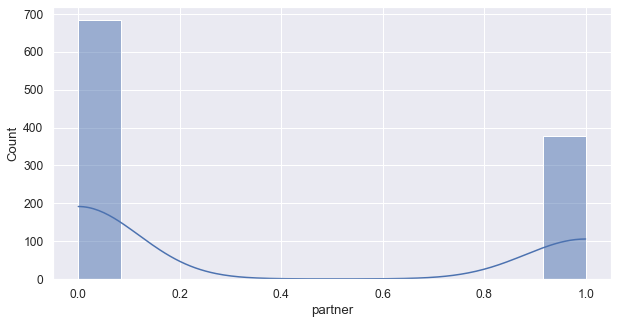

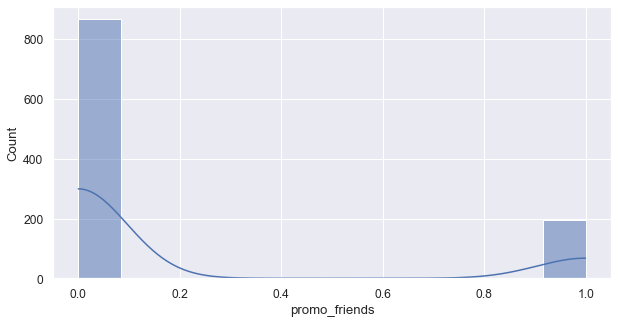

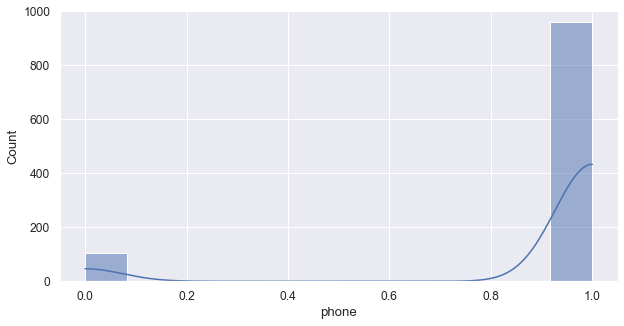

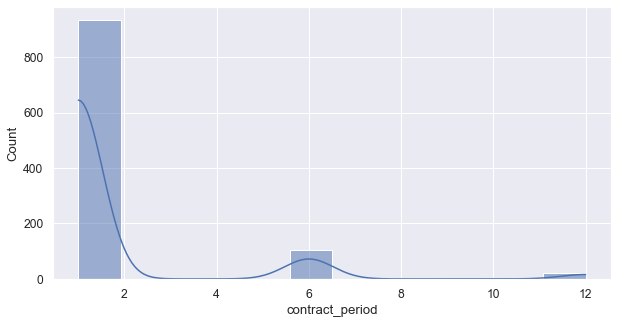

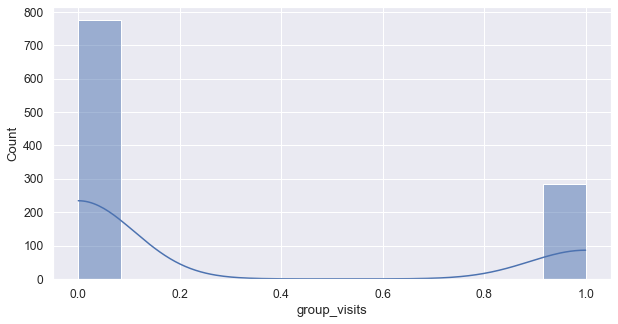

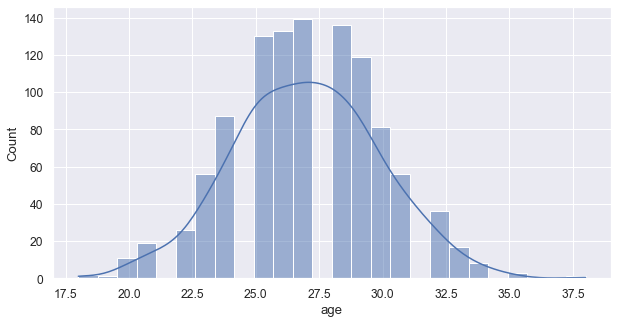

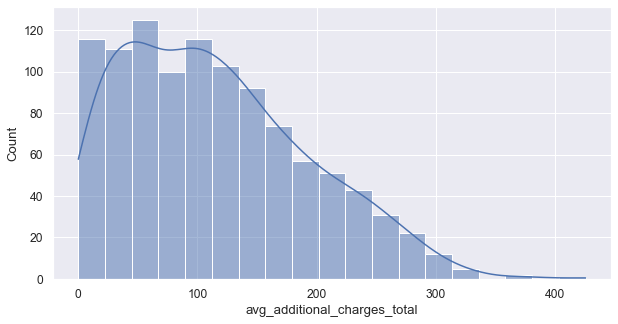

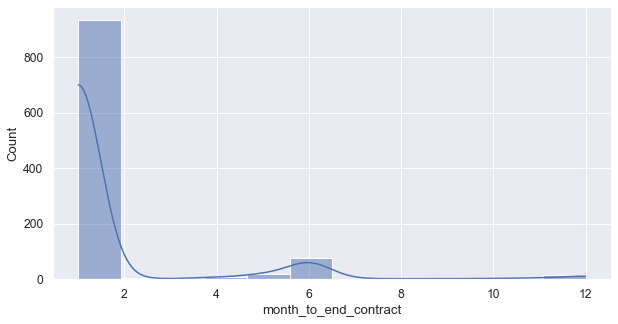

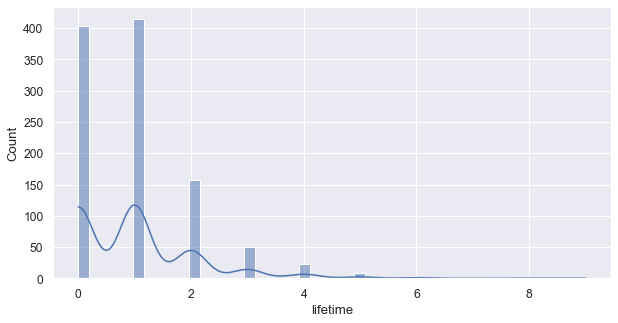

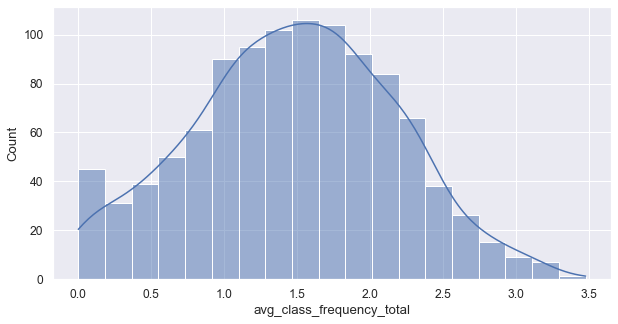

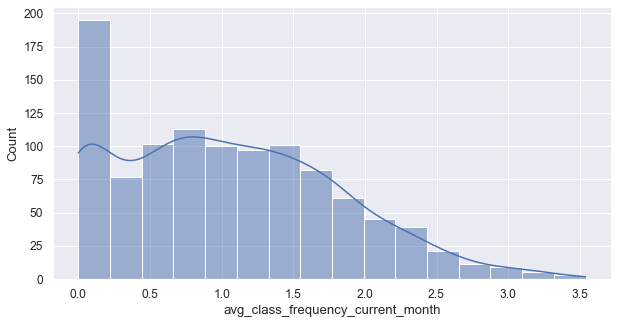

In [8]:
plot_hist(churn_true)

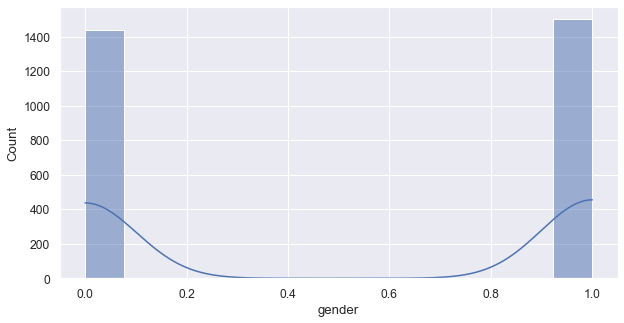

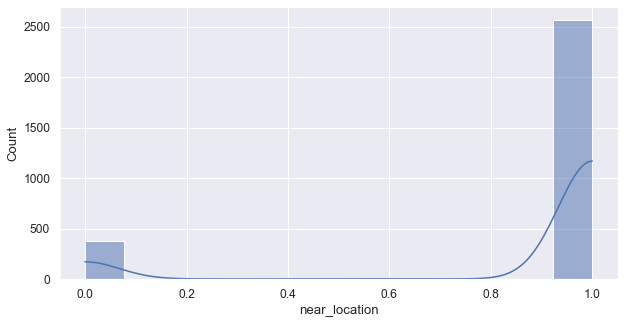

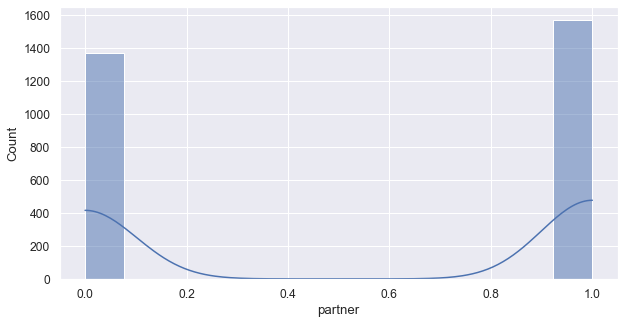

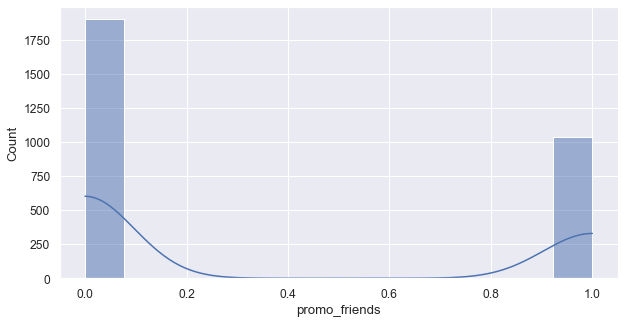

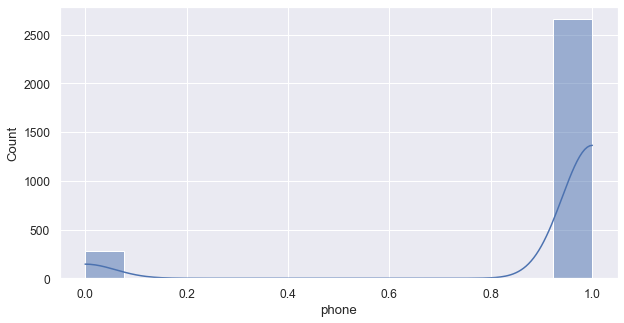

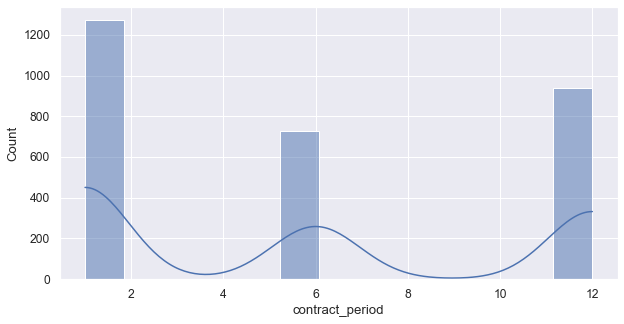

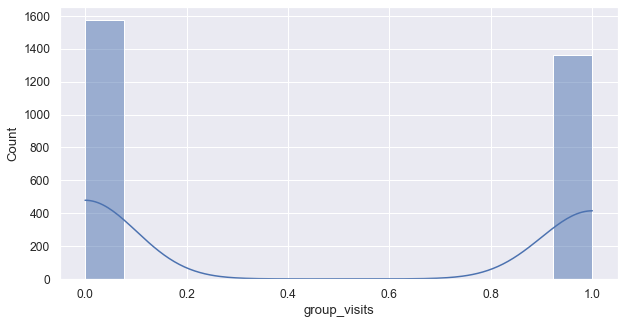

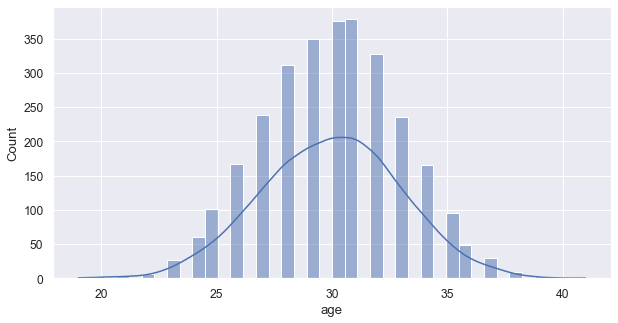

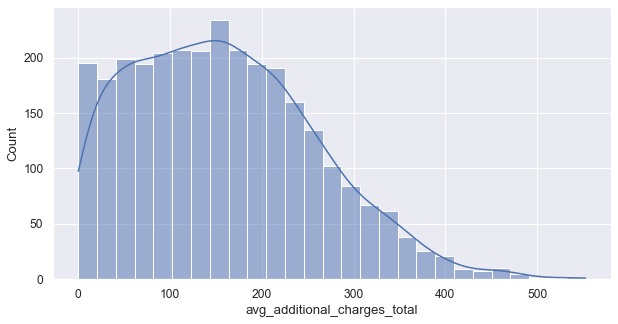

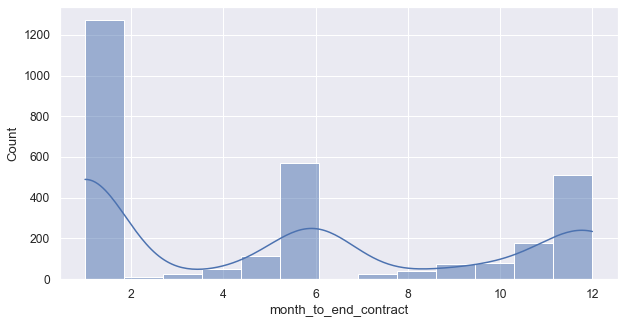

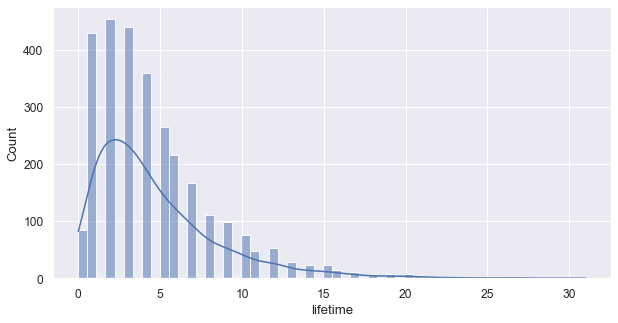

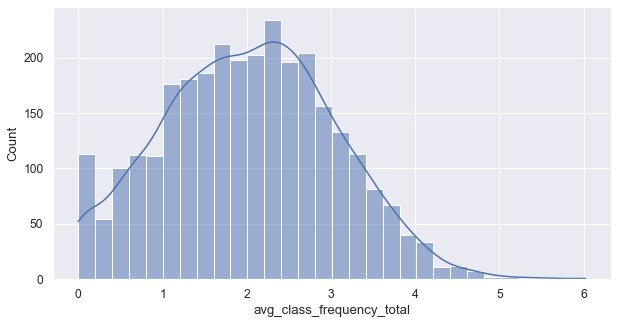

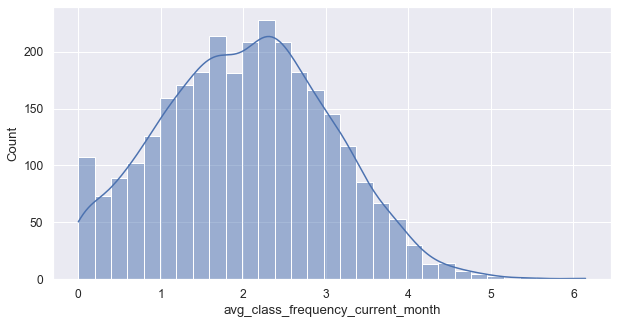

In [9]:
plot_hist(churn_false)

Построим матрицу корреляций

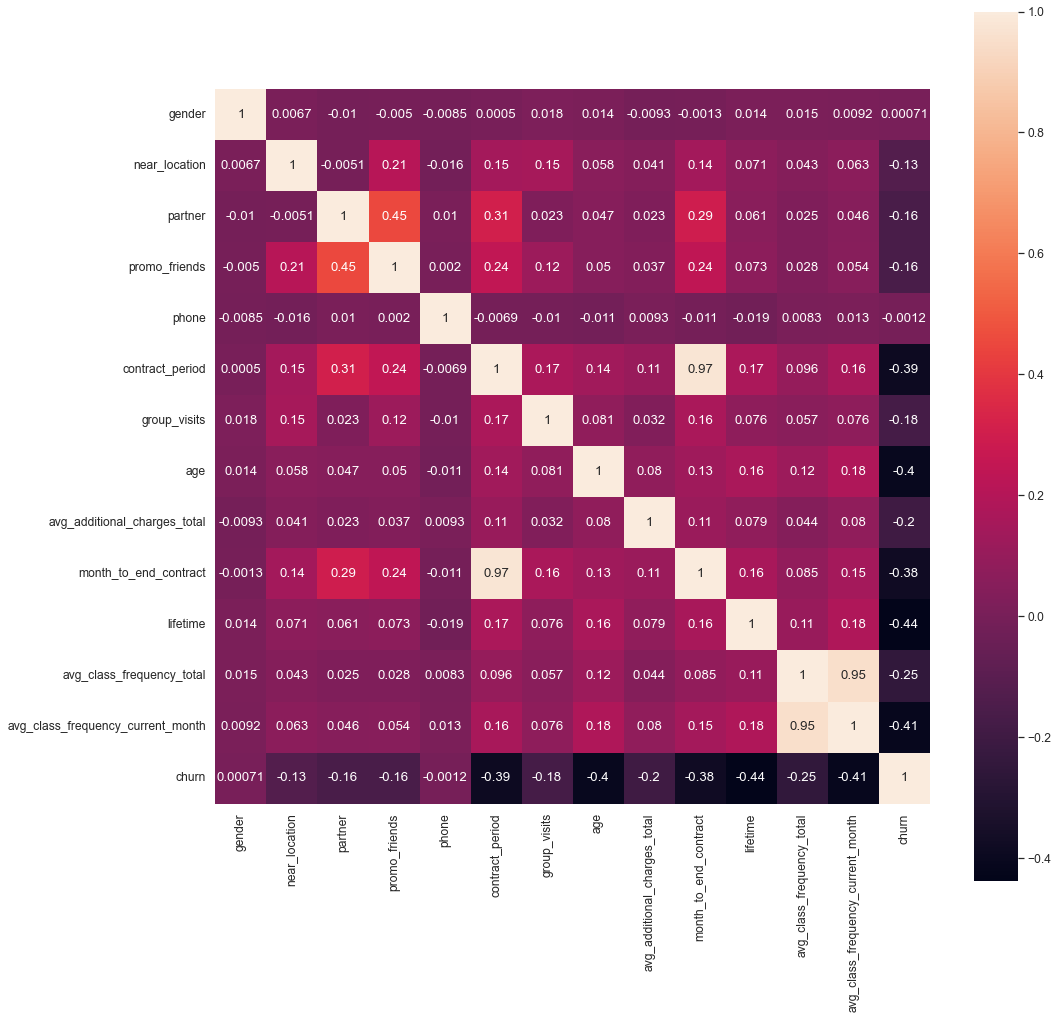

In [10]:
cm = df.corr()

# нарисуем тепловую карту с подписями для матрицы корреляций
plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, square=True)
plt.show()

Выводы
* видна сильная корреляция признаков `contact_period` (длительность текущего действующего абонемента) и `month_to_end_contract` (срок до окончания текущего действующего абонемента) что естественно и понятно: срок до окончания текущего действующего рассчитывается из `contact_period`
* видна сильная корреляция признаков `avg_class_frequency_total` (средняя частота посещений в неделю за все время с начала действия абонемента) и `avg_class_frequency_current_month` (средняя частота посещений в неделю за предыдущий месяц) что также очевидно взаимосвязано так как одно является следствием другого

##  Модель прогнозирования оттока клиентов
<a id='3'></a>

### Определим функции для работы в этом разделе

In [11]:
def print_metrics(y_true, y_pred, title='Метрики модели'):
    """
    Функция для расчета метрик модели Accuracу, Precision, Recall
    """
    print(title)
    print('\tAccuracy:', round(accuracy_score(y_true, y_pred), 2))
    print('\tPrecision:', round(precision_score(y_true, y_pred), 2))
    print('\tRecall:', round(recall_score(y_true, y_pred), 2))
    
    
def lr_rf_model_study(model, X_train_st, y_train, X_test_st):
    """
    Функция для обучения модели
    """
    model.fit(X_train_st, y_train)
    predictions = model.predict(X_test_st)
    return predictions

In [12]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['churn'])
y = df['churn']

In [13]:
# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизация

In [14]:
# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Создадим модели, обучим их и выведем метрики accuracy, precision и recall.

In [15]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)

# зададим алгоритм для модели случайного леса
rf_model = RandomForestClassifier(random_state=0)

# выведем все метрики
print_metrics(
    y_true=y_test, 
    y_pred=lr_rf_model_study(lr_model, X_train_st, y_train, X_test_st),
    title='Метрики модели Логистической регрессии'
)
print()
print_metrics(
    y_true=y_test,
    y_pred=lr_rf_model_study(rf_model, X_train_st, y_train, X_test_st),
    title='Метрики модели Случайного леса'
)

Метрики модели Логистической регрессии
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83

Метрики модели Случайного леса
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Для корректной интерпретации результатов порассуждаем

У нас выборке целевых 2 класса: 
* пользователи, которые перестали посещать фитнес-центр - "отвалились" (в столбце `churn` у них проставлена 1)
* пользователи, которые продолжают ходить в финтнес-центр (в столбце `churn` у них проставлен 0)

Метрика Accuracy работает, если классы распределены примерно поровну в выборке.

Посмотрим соотношение ушедших и оставшихся пользователей

In [16]:
round(len(df[df.churn == 1]) / len(df[df.churn != 1]), 2)

0.36

Классы не сбалансированы: соотношение ушедших пользователей к оставшимся примерно 36 к 64.

Поэтому в выборе лучшей модели нам нельзя руководствоваться метрикой Accuracy.

Выводы:
* Метрика `Precision` (точность) - в нашем случае это означает, что модель ошибочно занесёт пользователя в класс, что пользователь не собирается уходить. А на самом деле пользователь собирается покинуть нас. Мы могли бы поработать с пользователем, попытатся переубедить его, а мы его пропустим и не отработаем.
* Метрика `Recall` (полнота) - в нашем случае это значит, что модель ошибочно занесёт пользователя в класс, что пользователь собирается уходить, а пользователь на самом деле не собирается уходить от нас. Компания будет отрабатывать клиента, потратит ресурсы для проработки клиента впустую.
* Таким образом, в нашем случае, метрики `Precision` и `Recall` одинаково важны.
* Метрики `Precision` и `Recall` лучше у модели логистической регрессии, поэтому остановимся на ней.

## Кластеризация клиентов
<a id='4'></a>

Стандартизируем признаки и строим таблицу связок между объектами

In [17]:
# стандартизуем признаки
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# таблица связок между объектами
linked = linkage(X_sc, method = 'ward')

Визуализируем таблицу связок в виде дендограммы

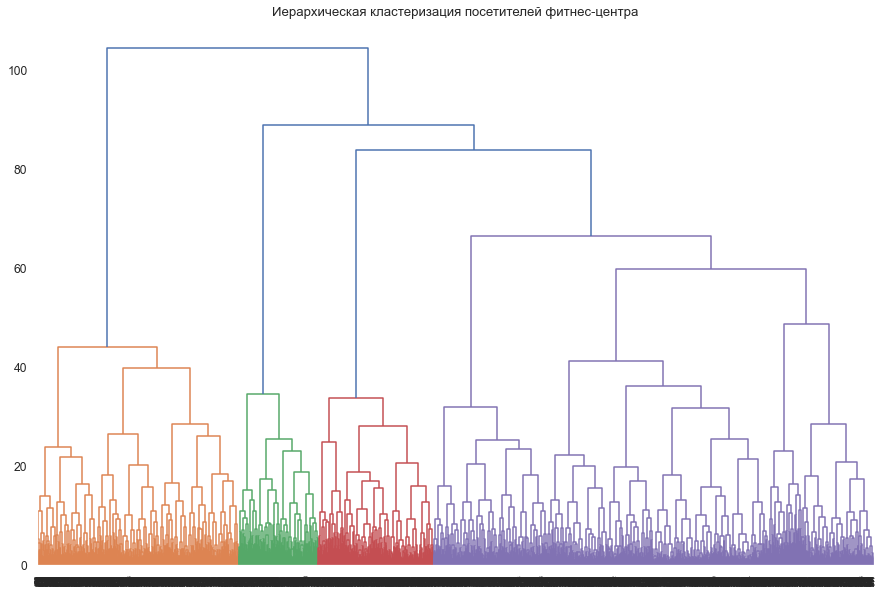

In [18]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация посетителей фитнес-центра')
plt.show() 

Визуально можно оценить количество кластеров: их 5 или 6.

Примем количество кластеров равное 5.

Зададим модель k_means, спрогнозируем кластеры для наблюдений и запишем метки кластера в датафрейме

In [19]:
# зададим модель k_means с количеством кластеров 5
km_model = KMeans(n_clusters = 5, random_state=0)

# спрогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km_model.fit_predict(X_sc)

# сохраним метки кластера в поле нашего датасета
df['cluster_km'] = labels

In [20]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


Посмотрим на средние значения признаков для всех кластеров.

In [21]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Опишем каждый кластер и дадим им псевдонимы, отражающие их суть.

Кластер 0 - `"Братухи-борцухи"`
* доля мужчин и женщин одинакова;
* 96% пользователей проживают или работают в районе, где находится фитнес-центр;
* 78% пользователей - сотрудники партнёров фитнес-клуба - лидеры;
* 57% пользователей привели друзья - они использовали промокод друга - лидеры;
* Все пользователи в этом кластере оставили свой контактный номер телефона;
* Среднее длительность текущего действующего абонемента - 11 месяцев - почти год - лидеры;
* 54% пользователей хотя бы раз посещали групповые занятия;
* Средний возраст в этом кластере - 30 лет;
* Пользователи из этого кластера на втором месте по покупке других доп услуг фитнес-центра - ходят в кафе, массажные и косметические салоны на территории фитнес-клуба;
* Среднее время до окончания абонемента у пользователей в этом кластре 10 месяцев - покупает абонементы сразу надолго - лидеры
* Ходят в фитнес-центр в среднем 2 раза в неделю;
* Пользователи ходят в фитнес-центр 2 раза в неделю стабильно каждый месяц. Т.е. показатель выше стабилен из месяца в месяц.
* Процент оттока пользователей в этом кластере минимален - 3%.

Кластер 1 - `"Параноики-середнячки"`
* доля мужчин и женщин одинакова;
* 86% пользователей проживают или работают в районе, где находится фитнес-центр;
* 47% пользователей в этом кластере - сотрудники партнёров фитнес-клуба - 2 место по этому показателю;
* 31% пользователей в этом кластере привели друзья - они использовали промокод друга - 2 место по этому показателю;
* Никто из пользователей в этом кластере не оставил свой контактный номер телефона;
* Среднее длительность текущего действующего абонемента - 5 месяцев - 2 место по этому показателю;
* 43% пользователей хотя бы раз посещали групповые занятия - 2 место по этому показателю;
* Средний возраст в этом кластере - 29 лет;
* Пользователи из этого кластера на третьем месте по покупке других доп услуг фитнес-центра;
* Среднее время до окончания абонемента у пользователей в этом кластре 5 месяцев - 2 место по этому показателю;
* Ходят в фитнес-центр в среднем 2 раза в неделю;
* Пользователи ходят в фитнес-центр 2 раза в неделю стабильно каждый месяц. Т.е. показатель выше стабилен из месяца в месяц.
* Процент оттока пользователей в этом кластере - 27%.

Кластер 2 - `"Путешественники-одиночки"`
* доля мужчин и женщин одинакова;
* Пользователи из этого кластера не проживают том же районе, где находится фитнес-центр;
* 46% пользователей в этом кластере - сотрудники партнёров фитнес-клуба - 3 место по этому показателю;
* 8% пользователей в этом кластере привели друзья - аутсайдеры по этому показателю;
* Все пользователи в этом кластере оставили свой контактный номер телефона;
* Среднее длительность текущего действующего абонемента - 2,7 месяца - 4 место по этому показателю;
* 22% пользователей хотя бы раз посещали групповые занятия - аутсайдеры по этому показателю;
* Средний возраст в этом кластере - 28 лет;
* Пользователи из этого кластера не покупают доп услуг - на 4 месте (предпоследнем) по этому показателю;
* Среднее время до окончания абонемента у пользователей в этом кластре 2,2 месяца - на 4 месте (предпоследнем месте) по этому показателю;
* Ходят в фитнес-центр в среднем 1,6 раза в неделю (3 раза в 2 недели)- на 4 месте (предпоследнем) по этому показателю;
* Пользователи ходят в фитнес-центр 3 раза в 2 недели стабильно каждый месяц;
* Процент оттока пользователей в этом кластере - 44% - на 2 месте по этому показателю.

Кластер 3 - `"Ленивцы"`
* Доля мужчин и женщин одинакова;
* Все пользователи из этого кластера проживают или работают в том же районе, где находится фитнес-центр;
* 35% пользователей в этом кластере - сотрудники партнёров фитнес-клуба - аутсайдеры по этому показателю;
* 24% пользователей в этом кластере привели друзья - 3 место по этому показателю;
* Все пользователи в этом кластере оставили свой контактный номер телефона;
* Среднее длительность текущего действующего абонемента - 2 месяца - аутсайдеры по этому показателю;
* 34% пользователей хотя бы раз посещали групповые занятия - 4 место по этому показателю;
* Средний возраст в этом кластере - 28 лет;
* Пользователи из этого кластера не покупают доп услуг - аутсайдеры по этому показателю;
* Среднее время до окончания абонемента у пользователей в этом кластре 2 месяца - аутсайдеры по этому показателю;
* Ходят в фитнес-центр в среднем 1 раза в неделю - аутсайдеры по этому показателю;
* Пользователи ходят в фитнес-центр 1 раз в неделю стабильно каждый месяц - аутсайдеры по этому показателю;
* Процент оттока пользователей в этом кластере - 51% - лидеры по этому показателю.

Кластер 4 - `"Релаксирующие олимпийцы"`
* доля мужчин и женщин одинакова;
* 97% пользователей проживают или работают в районе, где находится фитнес-центр;
* 36% пользователей в этом кластере - сотрудники партнёров фитнес-клуба - 4 место по этому показателю;
* 23% пользователей в этом кластере привели друзья - 4 место по этому показателю;
* Все пользователи в этом кластере оставили свой контактный номер телефона;
* Средняя длительность текущего действующего абонемента - 2,4 месяца - 3 место по этому показателю;
* 47% пользователей хотя бы раз посещали групповые занятия - 2 место по этому показателю;
* Средний возраст в этом кластере - 30 лет;
* Пользователи из этого кластера лидеры по покупке доп услуг;
* Среднее время до окончания абонемента у пользователей в этом кластре 2,5 месяца - на 3 месте по этому показателю;
* Ходят в фитнес-центр в среднем 3 раза в неделю - лидеры по этому показателю;
* Пользователи ходят в фитнес-центр 3 раза в 2 недели стабильно каждый месяц;
* Процент оттока пользователей в этом кластере - 7% - на 2 месте по этому показателю.

Построим распределения признаков для кадого кластера.

Кластер 0 - `"Братухи-борцухи"`

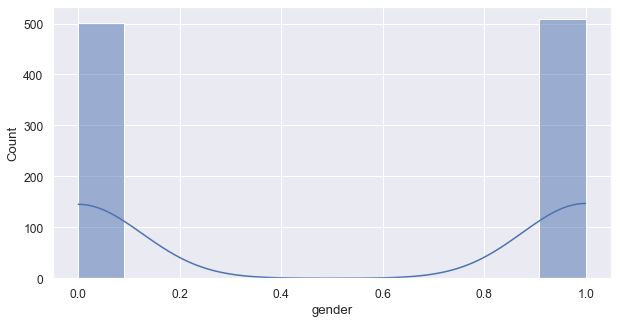

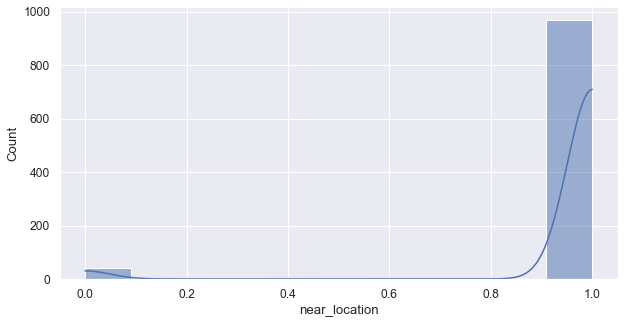

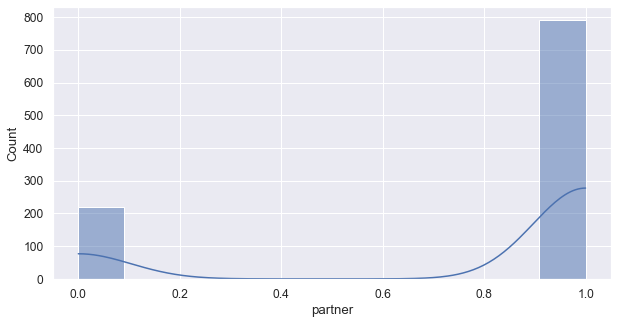

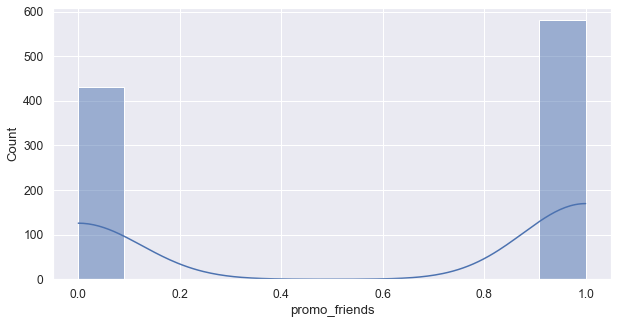

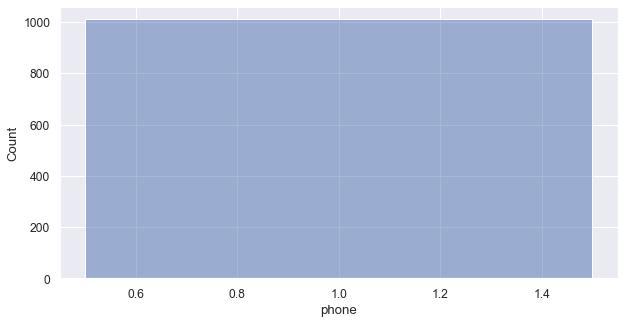

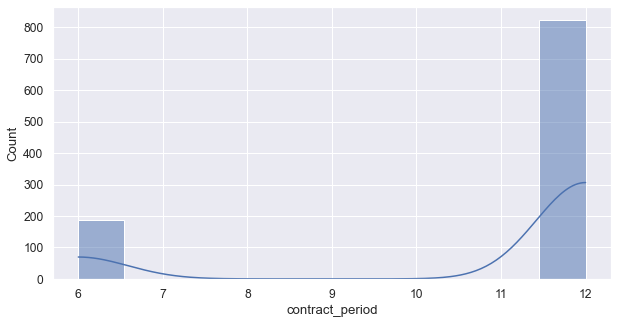

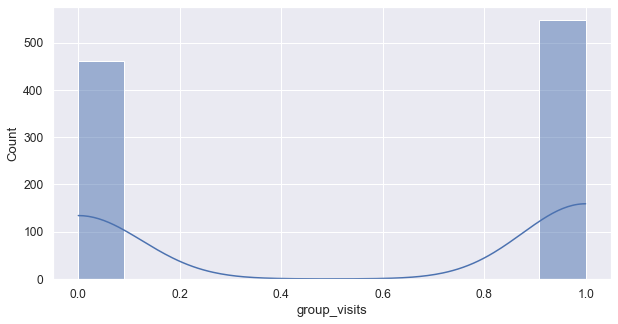

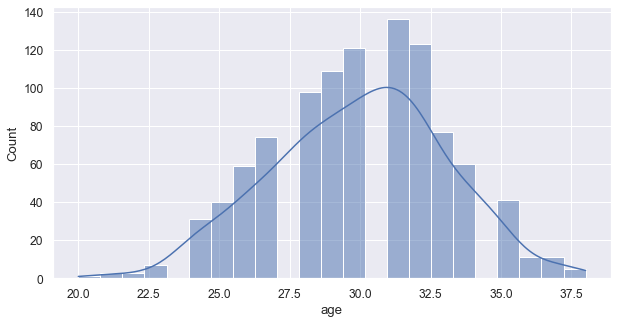

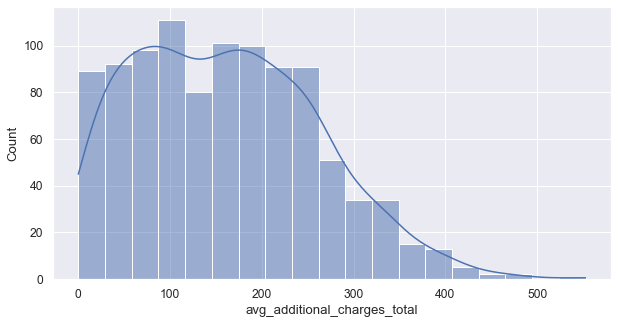

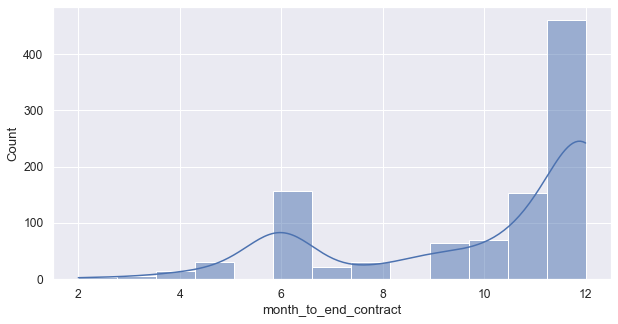

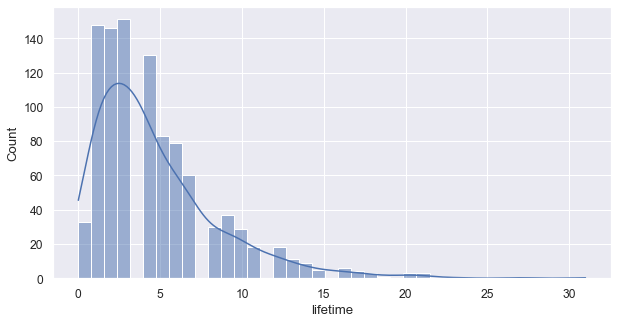

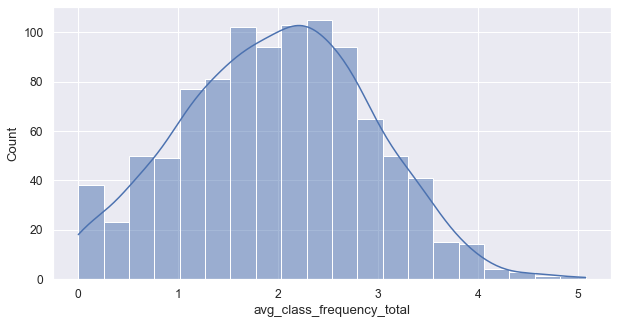

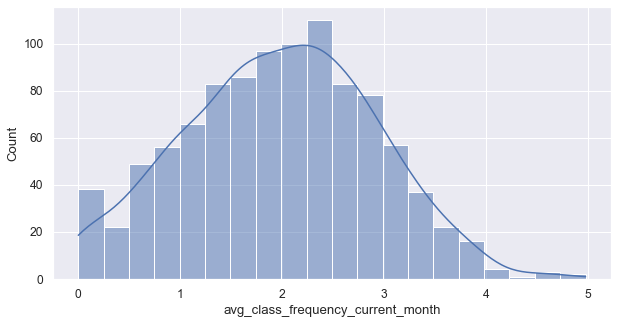

In [22]:
plot_hist(df[df.cluster_km == 0].drop(columns=['cluster_km']))

Дополнительные выводы о кластере `"Братухи-Борцухи"`
* длительность текущего действующего абонемента в этом кластере только 6 или 12 месяцев;
* львиная часть - длительности абонементов 12 месяцев - в этом кластере берут абонементы надолго - вероятно, условия партнёрской программы;
* посещают зал в основном от 1 до 3 раз в неделю стабильно.

Кластер 1 - `"Параноики-середнячки"`

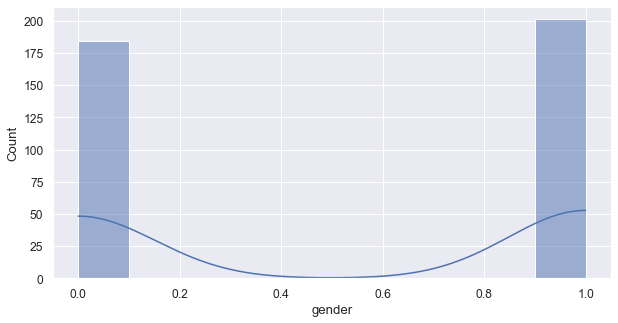

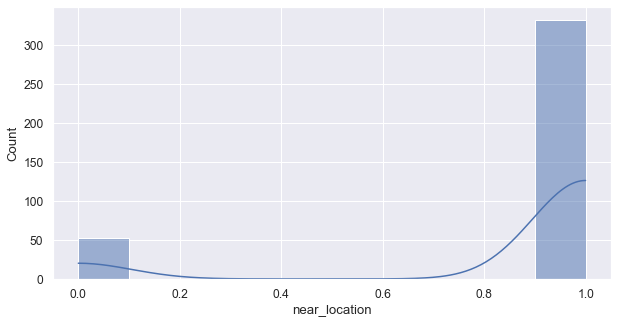

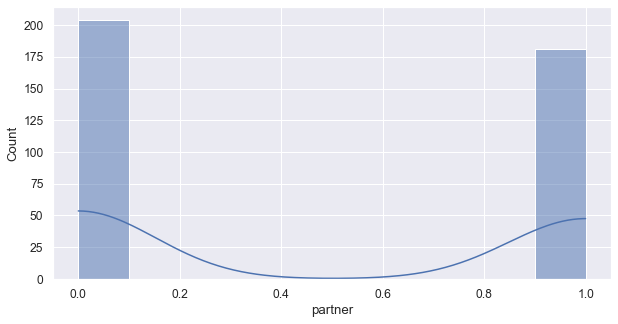

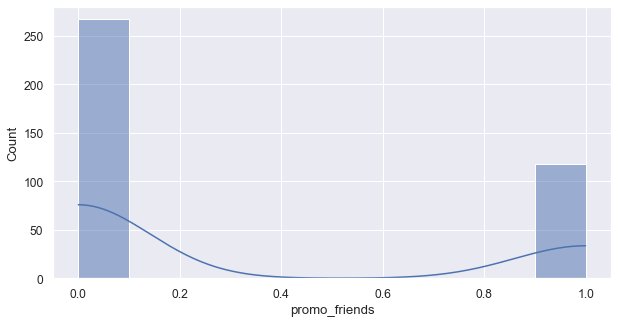

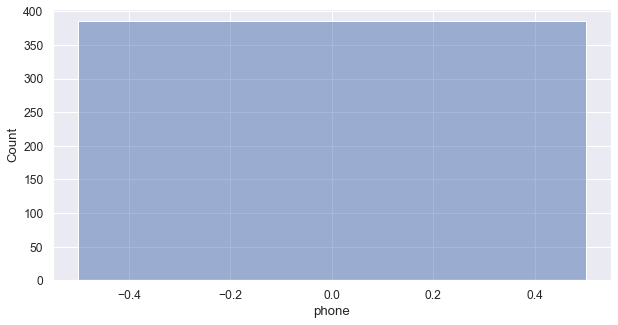

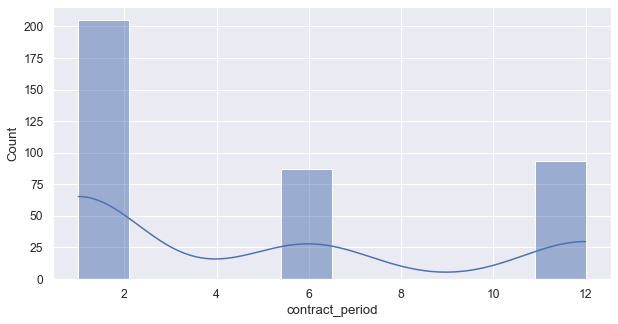

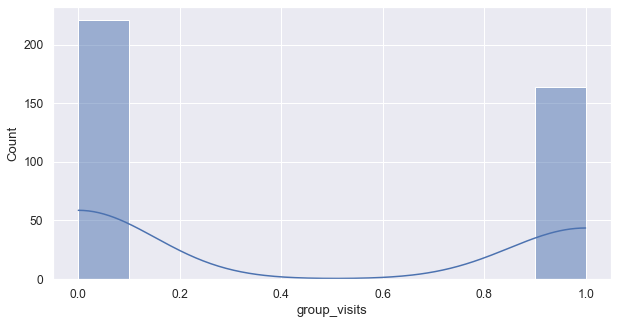

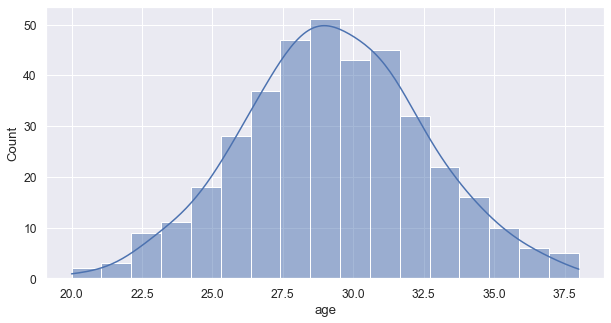

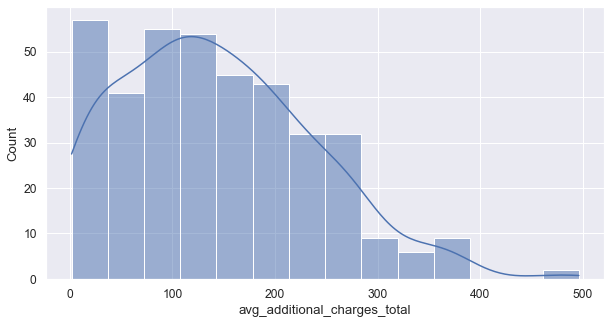

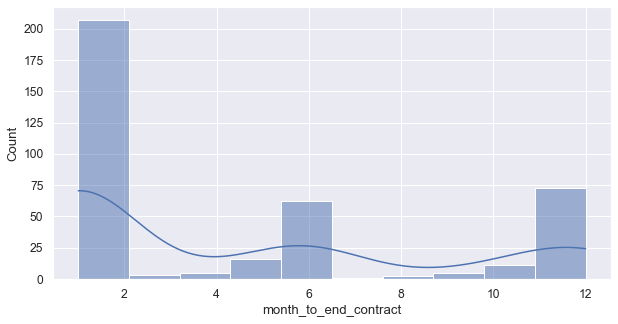

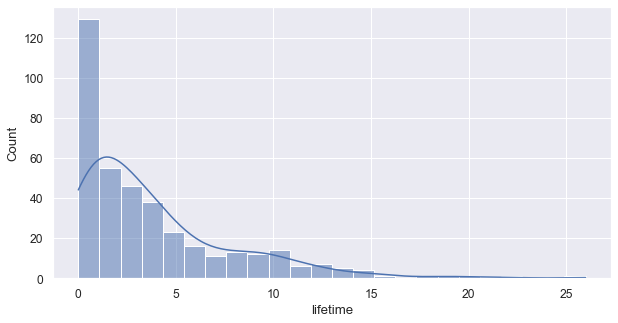

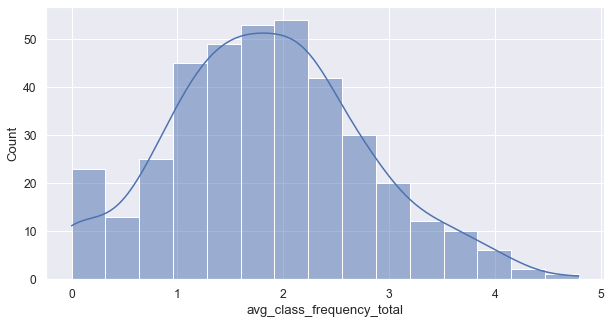

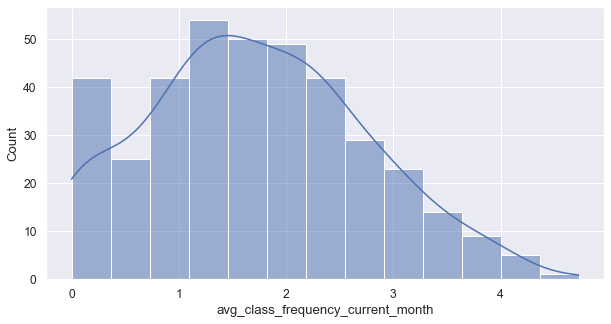

In [23]:
plot_hist(df[df.cluster_km == 1].drop(columns=['cluster_km']))

Дополнительные выводы о кластере `"Параноики-середнячки"`
* длительность текущего действующего абонемента в этом кластере 2, 6 или 12 месяцев;
* львиная часть - длительности абонементов 2 месяца. Примерно вдвое меньше абонементы на 6 и 12 месяцев;
* количество абонементов на 6 и 12 месяцев примерно одинаково;
* посещают зал в основном от 1 до 3 раз в неделю стабильно.

Кластер 2 - `"Путешественники-одиночки"`

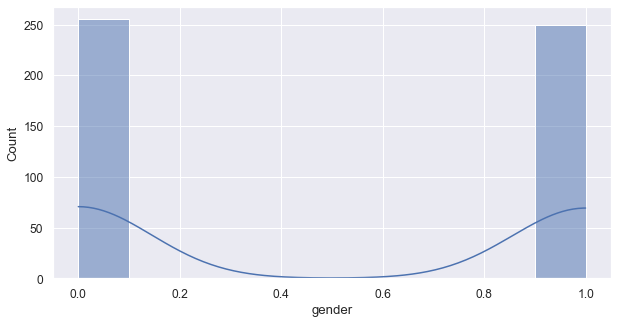

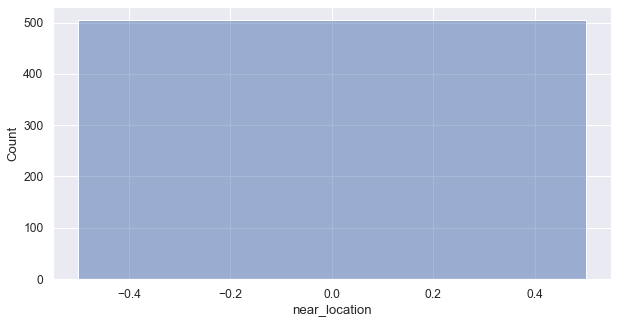

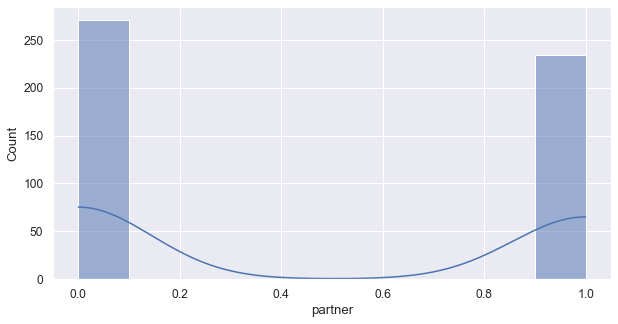

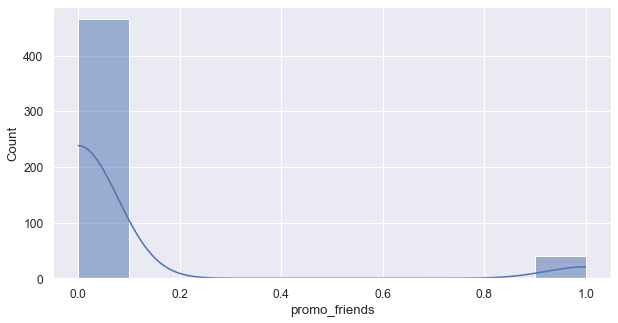

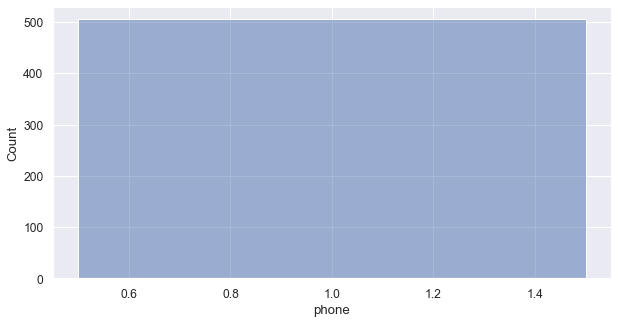

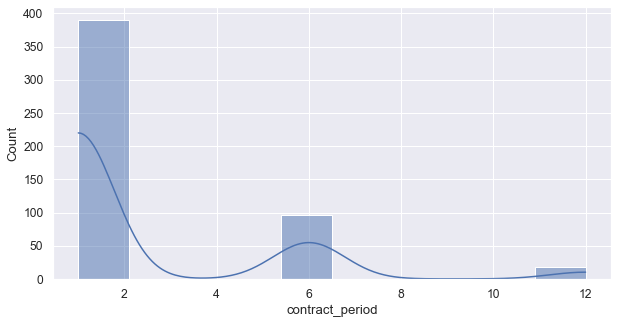

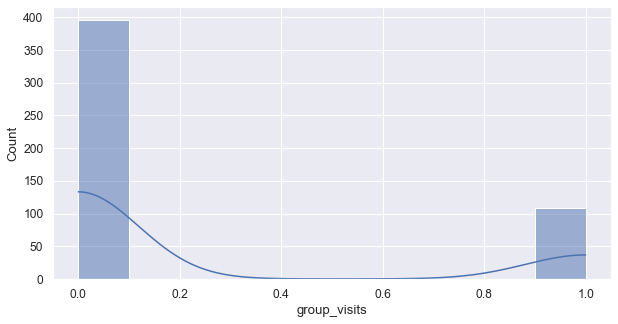

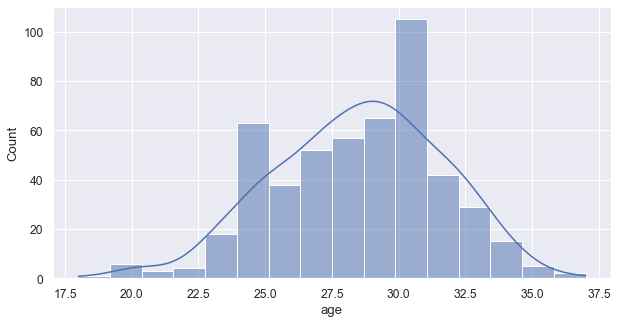

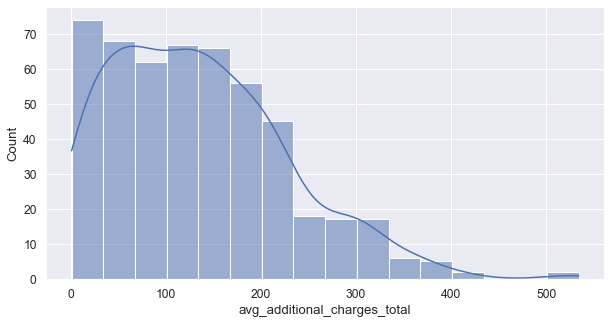

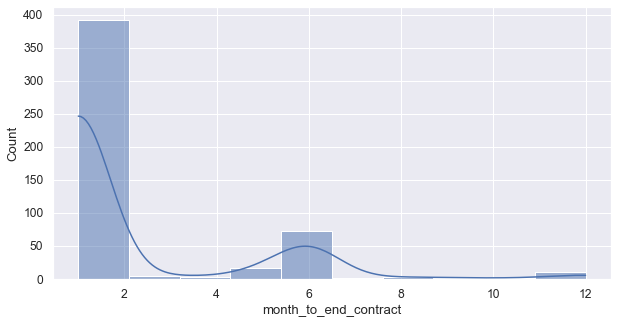

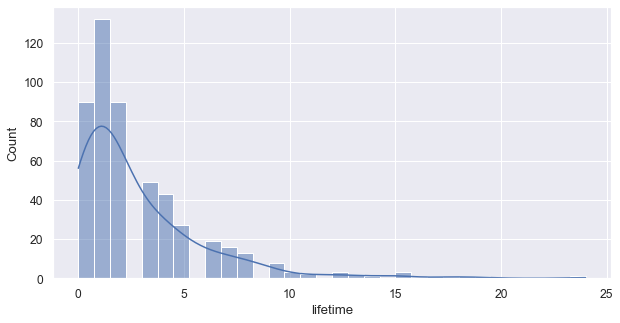

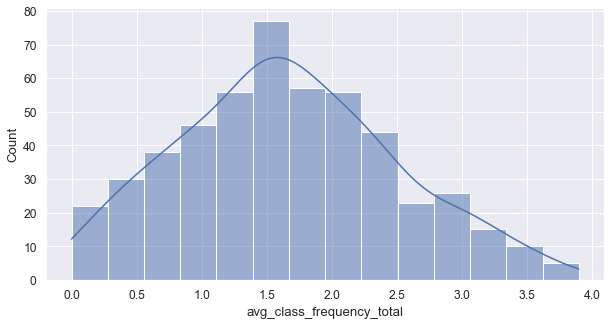

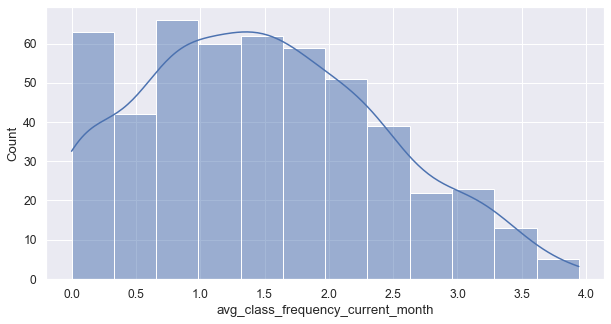

In [24]:
plot_hist(df[df.cluster_km == 2].drop(columns=['cluster_km']))

Дополнительные выводы о кластере `"Параноики-середнячки"`
* длительность текущего действующего абонемента в этом кластере 2, 6 или 12 месяцев;
* львиная часть - длительности абонементов 2 месяца. Примерно втрое меньше абонементы на 6 месяцев. На 12 месяцев покупают абонемент совсем незначительное число пользователей;
* посещают зал в основном от 1 до 3 раз в неделю стабильно.

Кластер 3 - `"Ленивцы"`

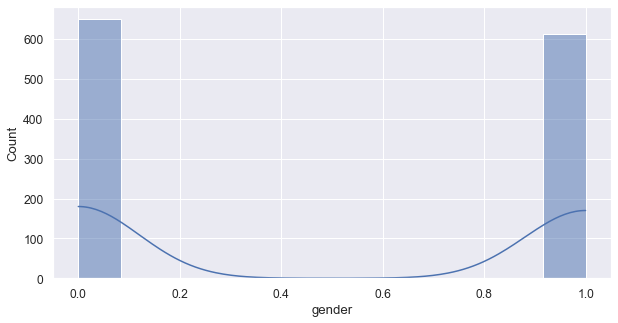

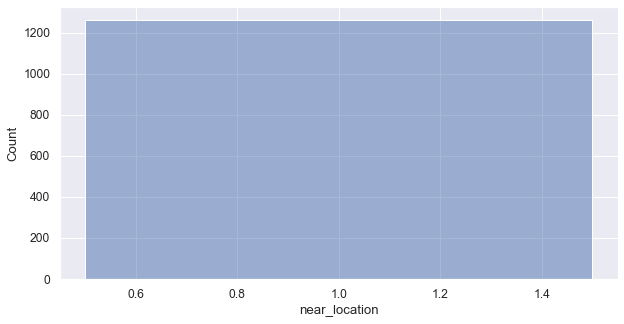

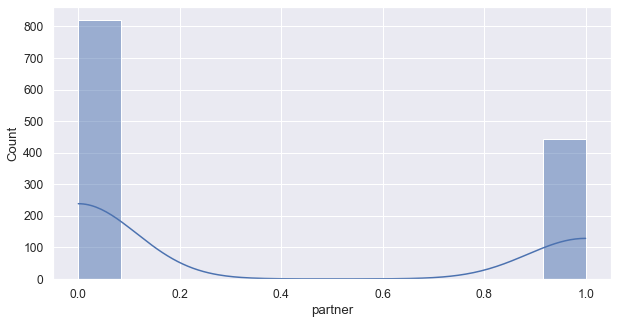

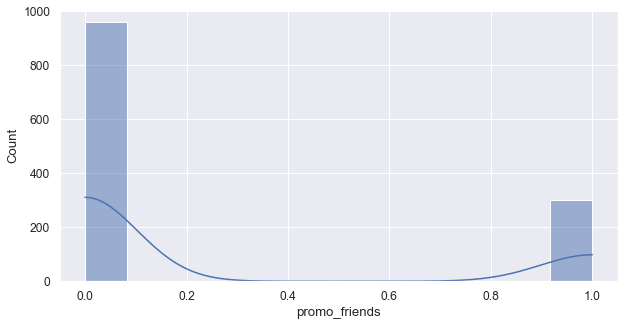

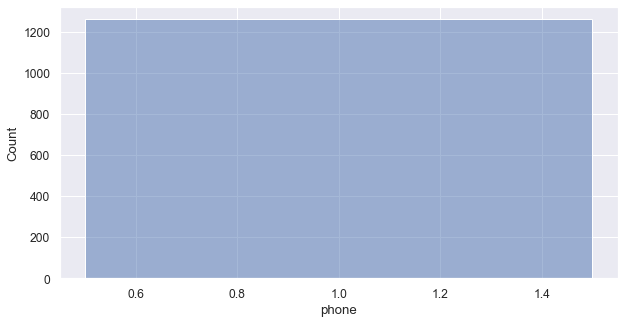

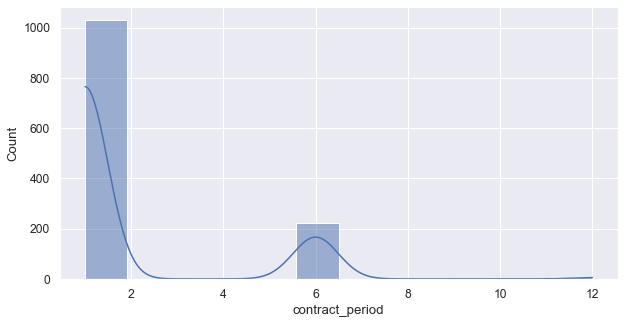

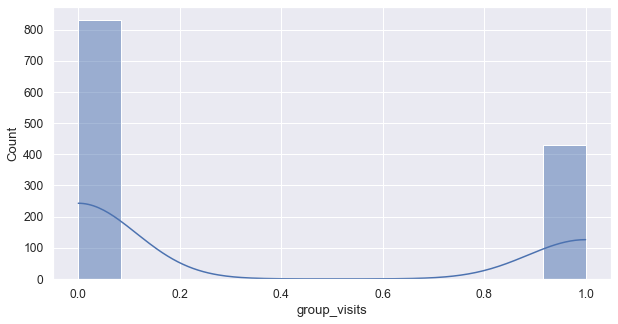

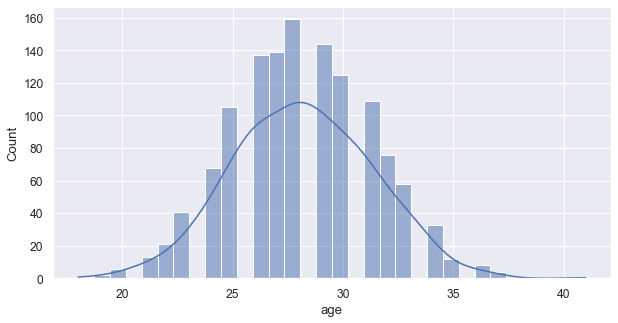

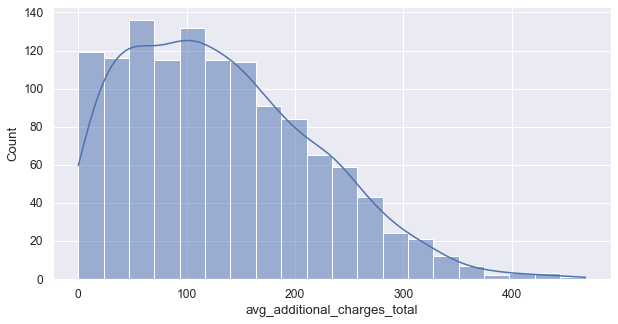

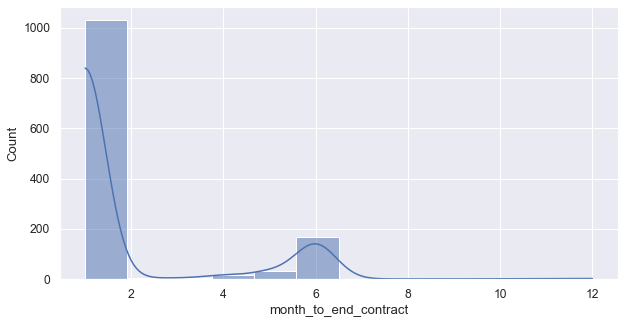

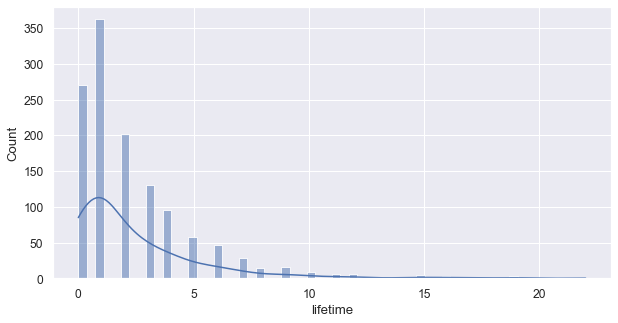

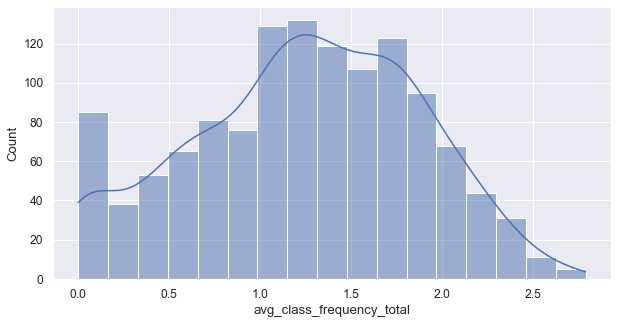

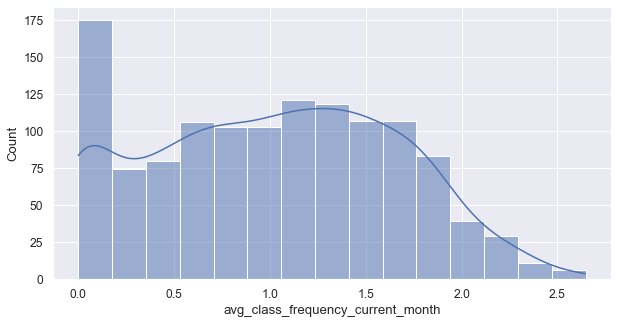

In [25]:
plot_hist(df[df.cluster_km == 3].drop(columns=['cluster_km']))

Дополнительные выводы о кластере `"Ленивцы"`:
* длительность текущего действующего абонемента в этом кластере 2, 6 или 12 месяцев;
* львиная часть - длительности абонементов 2 месяца. Примерно втрое меньше абонементы на 6 месяцев. Абонементы на 12 месяцев практически не покупают;
* посещают зал в основном от 1 до 2 раз в неделю стабильно.

Кластер 4 - `"Релаксирующие олимпийцы"`

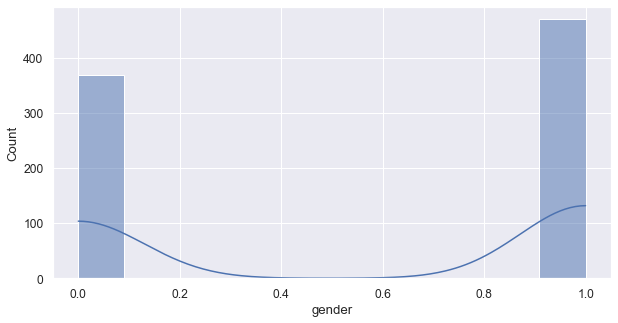

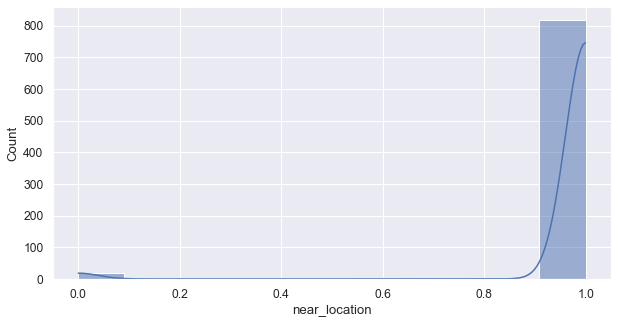

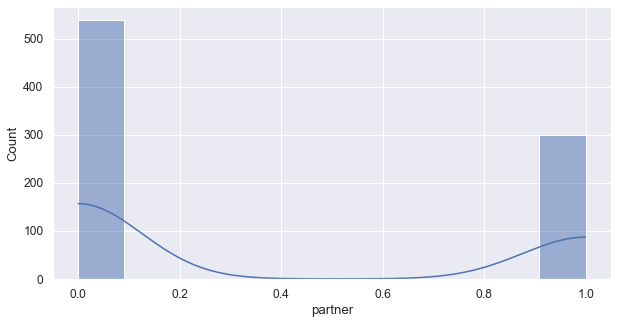

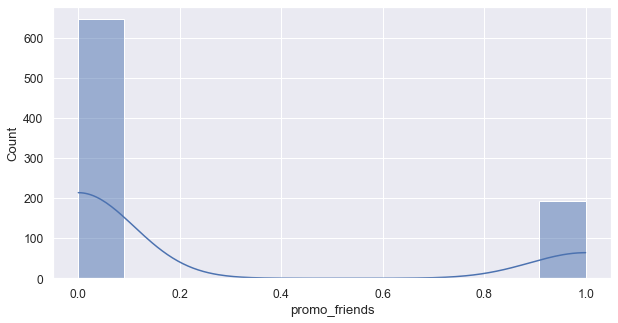

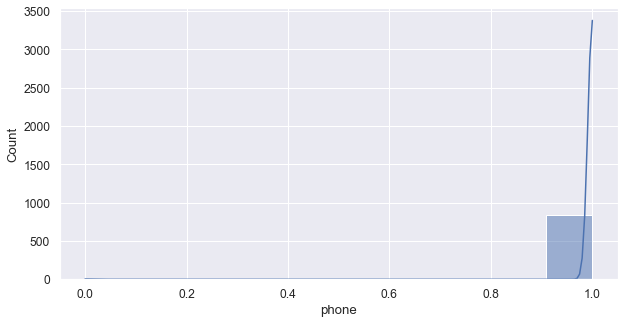

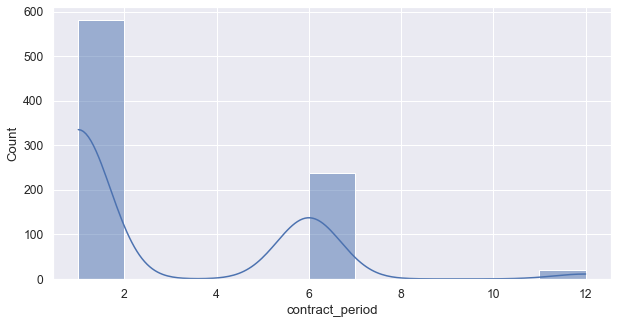

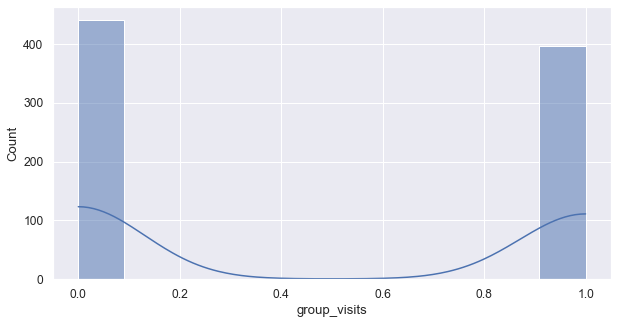

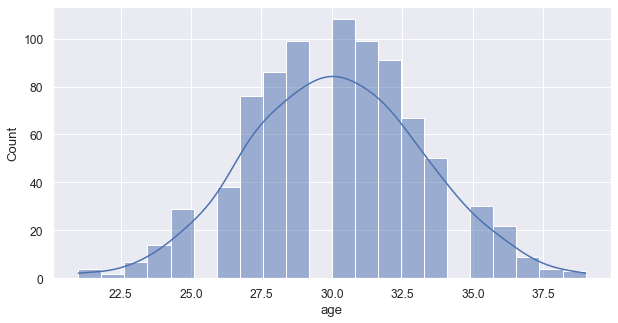

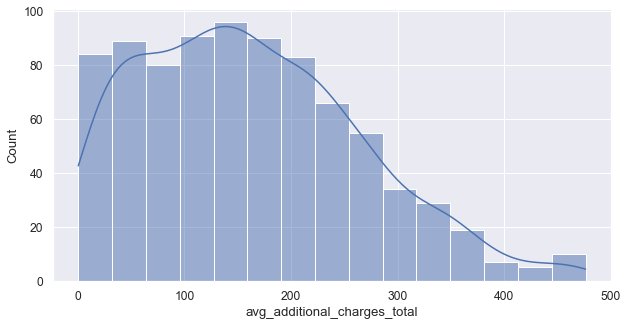

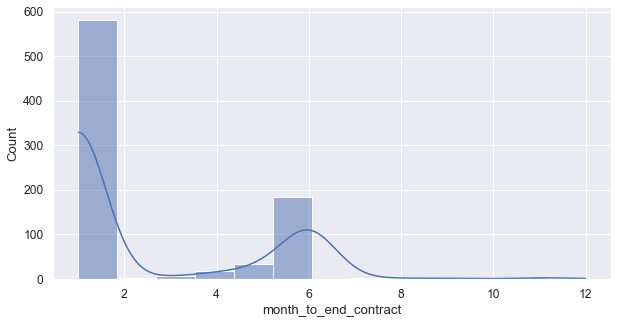

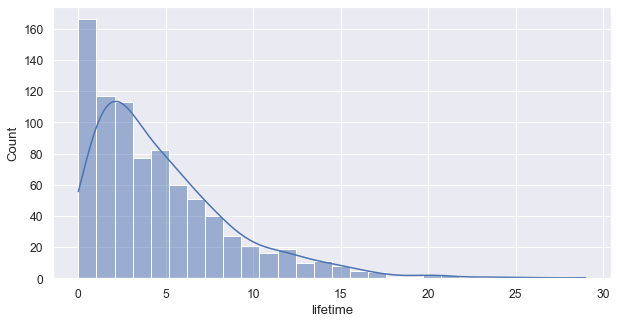

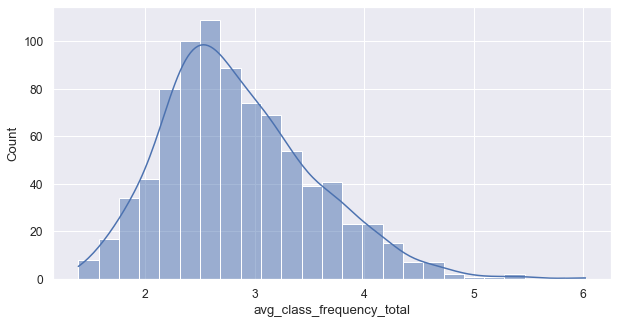

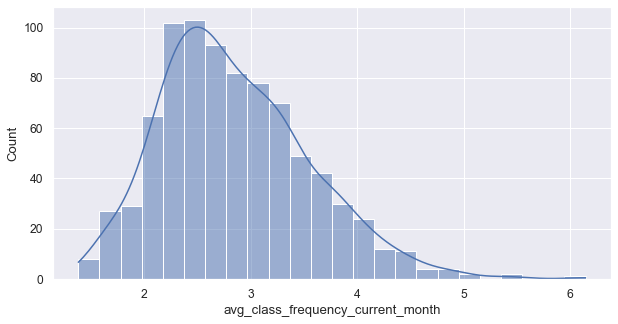

In [26]:
plot_hist(df[df.cluster_km == 4].drop(columns=['cluster_km']))

Дополнительные выводы о кластере `"Релаксирующие олимпийцы"`:
* длительность текущего действующего абонемента в этом кластере 2, 6 или 12 месяцев;
* львиная часть - длительности абонементов 2 месяца. Примерно вдвое меньше абонементы на 6 месяцев. На 12 месяцев покупают абонемент совсем незначительное число пользователей;
* посещают зал в основном от 2 до 4 раз в неделю стабильно.

### Доля оттока в каждом кластере
<a id='5'></a>

Для удобства посчитаем в отдельном датафрейме долю оттока пользователей в каждом кластере

В столбце `churn` значение 1 (True) соответствует тому, что пользователь ушёл.
Создадим датафрейм в котором сгруппируем пользователей по кластеру и посчитаем в каждом кластере сумму ушедших пользователей и общее количество пользователей в каждом кластере.

In [27]:
share_out = (
    df.groupby('cluster_km')
    .agg({'churn' : 'sum',
          'gender' : 'count'})
    .rename(columns={'churn' : 'sum',
                     'gender' : 'count'})
    .reset_index()
)
share_out

,cluster_km,sum,count
0,0,28,1010
1,1,103,385
2,2,224,505
3,3,649,1262
4,4,57,838


Посчитаем долю: поделим столбец с суммой sum на столбец с количеством всех пользователей count - так мы получим долю ушедших пользователей - долю оттока. Занесем эти значения в столбец `share_out`. 

Отсортируем датафрейм по доле оттока и выведем.

In [28]:
# доля оставшихся пользователей в каждом кластере
share_out['share_out'] = (share_out['sum'] / share_out['count']).round(4)

# отсортируем датафрейм по доле оттока
share_out = (
    share_out.sort_values(by='share_out', ascending=False)
    .reset_index(drop=True)
)
share_out

,cluster_km,sum,count,share_out
0,3,649,1262,0.5143
1,2,224,505,0.4436
2,1,103,385,0.2675
3,4,57,838,0.0680
4,0,28,1010,0.0277


Создадим датафрейм с названиями псевдонимов и ключами - номерами соответствующих кластеров

In [29]:
# псевдонимы кластеров
names = [
    'Братухи-борцухи', 'Параноики-середнячки', 'Путешественники-одиночки',
    'Ленивцы', 'Релаксирующие олимпийцы'
]

# ключи - id кластеров
id_clusters = range(share_out['cluster_km'].max() + 1)

# датафрейм псевдонимы кластеров - их ключи
cluster_names = pd.DataFrame({'cluster_name' : names, 'cluster_km' : id_clusters})
cluster_names

,cluster_name,cluster_km
0,Братухи-борцухи,0
1,Параноики-середнячки,1
2,Путешественники-одиночки,2
3,Ленивцы,3
4,Релаксирующие олимпийцы,4


Добавим псевдонимы кластеров в результирующий датафрейм с долями оттока клиентов `share_out`. Для этого соединим результирующий датафрейм с датафреймом с названиями кластеров по полю `cluster_km`.

In [30]:
share_out = share_out.merge(cluster_names, on='cluster_km', how='inner')
share_out

,cluster_km,sum,count,share_out,cluster_name
0,3,649,1262,0.5143,Ленивцы
1,2,224,505,0.4436,Путешественники-одиночки
2,1,103,385,0.2675,Параноики-середнячки
3,4,57,838,0.0680,Релаксирующие олимпийцы
4,0,28,1010,0.0277,Братухи-борцухи


Выводы:
* Лидеры по оттоку пользователей - кластер `"Ленивцы"` - более половины (51%) пользователей перестают посещать фитнес-центр.
* Немного отстают по оттоку пользователи кластера `"Путешественники-одиночки"` - 44% пользователей этого кластера уходят.
* Хорошие показатели показывают кластеры `"Релаксирующие олимпийцы"` и `"Братухи-борцухи"`.

## Общие выводы и рекомендации
<a id='6'></a>


* Лидеры по оттоку - кластер `"Ленивцы"` - около 51%  пользователей в этом кластере. Не удивительно: они редко ходят на тренировки, плохо ходят на групповые занятия, не покупают доп услуг. Достаточно аморфный кластер пользователей, которые сами не знают, зачем ходят на фитнес. Им надо об этом "рассказать". Скорее всего пользователям в этом кластере нужен мотиватор или "надзиратель" - кто-то или что-то, что будет их потталкивать на активные действия, следить и подталкивать их. Над этим кластером пользователей стоит поработать.
* На втором месте по оттоку - кластер `"Путешественники-одиночки"` - около 44% пользователей в этом кластере. Скорее всего основная причина, почему "Путешественники-одиночки" бросают ходить на тренировки - удаленность фитнес-центра. Почти половина (46%) пользователей в этом кластере - сотрудники компаний-партнёров фитнес-центра. Создаётся впечатление, что пользователи воспользовались выгодным предложением партнёра - купили, чтобы было, а удобно ли им добираться до фитнес-центра не подумали, не взвесили свои возможности. На групповые занятия не ходят, доп услуг не покупают. Необходимо проработать пользователей в этом кластере, возможно придумать варианты посещения или перехода в фитнес-центр, находящийся территориально ближе к пользователям этого кластера.
* На третьем месте по оттоку - `"Параноики-Середнячки"` - около 27% пользователей в этом кластере. Типичные середнячки, которые почему-то принципиально не оставляют свои номера телефонов. 46% пользователей в этом кластере - сотрудники компаний-партнёров фитнес-центра, треть привели друзья, абонементы покупаются на достаточно продолжительный период (средняя продолжительность абонемента 5 месяцев). Ходят на тренировки стабильно и уверенно 2 раза в неделю. Скорее всего ходят "для поддержания формы" - без спортивных рекордов, но с хорошей регулярностью. Весьма подвижны, ходят на групповые занятия, но неактивно пользуются доп услугами. Достаточно активный кластер пользователей, с которыми можно также поработать.
* На четвертом месте по оттоку - `"Релаксирующие олимпийцы"` - всего 7% оттока пользователей. Пользователям из этого кластера не нужен мотиватор, они сами знают зачем и почему ходят на фитнес. Активно ходят на групповые занятия, посещают фитнес-центр очень активно и с завидной регулярностью (3 раза в неделю). Лидеры по покупке доп услуг фитнеса - наши олимпийцы любят порелаксировать, без этого никуда. Активный самостоятельный кластер пользователей, скорее всего не нуждаются в дополнительном "направлении" и "стимулировании" - эти ребята сами знают, что им делать и не нуждаются в мотивациях, поощерениях, но готовы платить за фичи, если угадать их потребности.
* Лучше всех показывает себя кластер `"Братухи-борцухи"` - всего 3% пользователей уходит. Большинство пользователей из этого кластера (78%) - сотрудники компаний-партнёров фитнес-центра, абонементы покупаются на длительный период (средняя продолжительность абонемента 11 месяцев) - очевидно, у сотрудников компаний-партнёров есть какие-то особые условия, выгодные предложения для покупки абонементов и пользователи очень активно пользуются этими предложениями. Также более половины пользователей из этого кластера привели их друзья. Скорее всего и ходят вместе, достаточно часто и стабильно - вместе ходить гораздо интереснее и веселей. Пользователи из этого кластера активно покупают доп услуги - после тренировки вместе с подругой выпить ягодный фреш или брутально накачаться морковным смузи с братюней - выглядит весьма правдоподобно. Лидеры по посещению групповых занятий. Активный общительный кластер пользователей, которые "за любой совместный движ", которые готовы платить за этот "движ". Очень перспектиный кластер для работы по предоставлению дополнительных, желательно групповых услуг, нацеленных на личное взаимодействие и общение.
